In [1]:
try:
    sc.stop()
except:
    pass

In [46]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('Capstone_Project').setMaster('local[4]')
sc = SparkContext.getOrCreate(conf = conf)

from pyspark.sql import SparkSession 
from pyspark.sql.types import StructField, StringType, IntegerType, StructType
spark = SparkSession.builder.appName('Capstone_SQL').getOrCreate()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/home/hadoop/Spotify2020_logistic.csv')
sp = spark.read.csv('file:///home/hadoop/Spotify2020_logistic.csv', inferSchema=True, header=True)
sp.cache()   
# sp.show(5)

DataFrame[_c0: int, acousticness: double, danceability: double, energy: double, instrumentalness: double, liveness: double, mode: double, speechiness: double, tempo: double, valence: double, ts_0: double, ts_1: double, ts_3: double, ts_4: double, ts_5: double, key_0: double, key_1: double, key_2: double, key_3: double, key_4: double, key_5: double, key_6: double, key_7: double, key_8: double, key_9: double, key_10: double, key_11: double, duration: double, loudness: double, popularity: double]

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,mode,speechiness,tempo,valence,ts_0,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration,loudness,popularity
0,0.499,0.4360,0.655,0.000008,0.6880,0.0,0.0583,121.002,0.4120,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306571,0.731905,1.0
1,0.700,0.0692,0.285,0.673000,0.1990,1.0,0.0482,78.572,0.0312,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.619974,0.548575,0.0
2,0.221,0.7000,0.722,0.000000,0.2720,0.0,0.0369,90.989,0.7560,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.135798,0.867960,1.0
3,0.729,0.2000,0.282,0.887000,0.0837,0.0,0.0468,74.381,0.0372,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363803,0.408646,0.0
4,0.190,0.7110,0.598,0.000000,0.1500,0.0,0.1820,140.175,0.7370,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114744,0.753082,1.0


In [32]:
df.dropna(inplace=True)
df.isnull().sum()

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
mode                0
speechiness         0
tempo               0
valence             0
ts_0                0
ts_1                0
ts_3                0
ts_4                0
ts_5                0
key_0               0
key_1               0
key_2               0
key_3               0
key_4               0
key_5               0
key_6               0
key_7               0
key_8               0
key_9               0
key_10              0
key_11              0
duration            0
loudness            0
popularity          0
dtype: int64

In [12]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
acousticness,1946.0,0.187248,0.269683,0.000001,0.002902,0.050600,0.255750,0.996
danceability,1946.0,0.613230,0.166368,0.000000,0.491250,0.619000,0.737000,0.980
energy,1946.0,0.686761,0.222816,0.006320,0.550000,0.706000,0.876750,1.000
instrumentalness,1946.0,0.236243,0.363184,0.000000,0.000000,0.000098,0.532000,0.995
liveness,1946.0,0.230834,0.184535,0.014700,0.104000,0.147000,0.317000,0.990
mode,1946.0,0.579137,0.493825,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,1946.0,0.111295,0.108636,0.000000,0.042400,0.063150,0.132750,0.933
tempo,1946.0,124.446351,25.917899,0.000000,106.979750,128.026500,138.064000,211.749
valence,1946.0,0.427260,0.245744,0.000000,0.223250,0.411000,0.614750,0.978
ts_0,1946.0,0.001028,0.032050,0.000000,0.000000,0.000000,0.000000,1.000


In [9]:
sp.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- ts_0: double (nullable = true)
 |-- ts_1: double (nullable = true)
 |-- ts_3: double (nullable = true)
 |-- ts_4: double (nullable = true)
 |-- ts_5: double (nullable = true)
 |-- key_0: double (nullable = true)
 |-- key_1: double (nullable = true)
 |-- key_2: double (nullable = true)
 |-- key_3: double (nullable = true)
 |-- key_4: double (nullable = true)
 |-- key_5: double (nullable = true)
 |-- key_6: double (nullable = true)
 |-- key_7: double (nullable = true)
 |-- key_8: double (nullable = true)
 |-- key_9: double (nullable = true)
 |-- key_10: double (nullable = true)
 |

In [6]:
from pyspark.sql.functions import *
sp.select([count(when(isnan(c), c)).alias(c) for c in sp.columns]).show()

+---+------------+------------+------+----------------+--------+----+-----------+-----+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+--------+--------+----------+
|_c0|acousticness|danceability|energy|instrumentalness|liveness|mode|speechiness|tempo|valence|ts_0|ts_1|ts_3|ts_4|ts_5|key_0|key_1|key_2|key_3|key_4|key_5|key_6|key_7|key_8|key_9|key_10|key_11|duration|loudness|popularity|
+---+------------+------------+------+----------------+--------+----+-----------+-----+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+--------+--------+----------+
|  0|           0|           0|     0|               0|       0|   0|          0|    0|      0|   0|   0|   0|   0|   0|    0|    0|    0|    0|    0|    0|    0|    0|    0|    0|     0|     0|       0|       0|         0|
+---+------------+------------+------+----------------+--------+----+-----------+-----+-------+----+----

In [19]:
df.corr()

,acousticness,danceability,energy,instrumentalness,liveness,mode,speechiness,tempo,valence,ts_0,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration,loudness,popularity
acousticness,1.000000,-0.030002,-0.696249,-0.026961,-0.202028,0.116997,-0.055388,-0.221253,-0.005518,0.067957,...,-0.003925,-0.023567,-0.022911,0.000378,0.044177,0.007575,-0.043150,0.121985,-0.389012,0.135839
danceability,-0.030002,1.000000,-0.212505,-0.332895,-0.293929,-0.063017,0.287383,-0.053039,0.405012,-0.118305,...,0.009720,-0.043303,-0.066284,0.040921,-0.076092,0.053180,0.075804,0.061426,0.095641,0.451050
energy,-0.696249,-0.212505,1.000000,0.176107,0.313610,-0.092632,-0.049070,0.275854,0.022964,-0.077304,...,-0.034586,0.057717,0.044742,0.005791,0.002765,-0.010153,0.042320,-0.117733,0.440494,-0.280541
instrumentalness,-0.026961,-0.332895,0.176107,1.000000,0.077613,-0.020379,-0.225862,0.020778,-0.274574,0.024370,...,-0.071431,0.021726,0.082616,-0.054374,0.042755,0.026927,-0.016410,0.004884,-0.287503,-0.603378
liveness,-0.202028,-0.293929,0.313610,0.077613,1.000000,-0.046090,0.058956,0.087213,-0.079827,-0.026609,...,0.026039,-0.028449,0.011073,0.002472,0.064334,-0.014375,-0.002717,-0.240285,0.077291,-0.270710
mode,0.116997,-0.063017,-0.092632,-0.020379,-0.046090,1.000000,-0.025305,-0.021139,0.011572,0.027362,...,-0.062776,-0.099665,0.082331,0.067621,0.018117,-0.148604,-0.120045,-0.028516,-0.005175,0.012771
speechiness,-0.055388,0.287383,-0.049070,-0.225862,0.058956,-0.025305,1.000000,0.069519,0.162743,-0.032876,...,-0.019303,-0.022119,-0.044818,0.069563,-0.053726,0.010352,0.055783,-0.159282,0.050755,0.217390
tempo,-0.221253,-0.053039,0.275854,0.020778,0.087213,-0.021139,0.069519,1.000000,0.013459,-0.154052,...,-0.017659,-0.007678,-0.006302,0.048233,0.024073,-0.032240,0.019179,-0.027545,0.128024,-0.078915
valence,-0.005518,0.405012,0.022964,-0.274574,-0.079827,0.011572,0.162743,0.013459,1.000000,-0.055794,...,0.001868,0.032195,-0.028077,0.019604,-0.030350,-0.024028,0.083748,-0.144331,0.187553,0.229391
ts_0,0.067957,-0.118305,-0.077304,0.024370,-0.026609,0.027362,-0.032876,-0.154052,-0.055794,1.000000,...,-0.009540,-0.010340,-0.011251,-0.009106,-0.009638,-0.009072,-0.009474,-0.029552,-0.123084,0.000577


### Check for Multicollinearity

In [20]:
# Select upper triangle of correlation matrix
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [21]:
to_drop

[]

No two columns has high correlation value

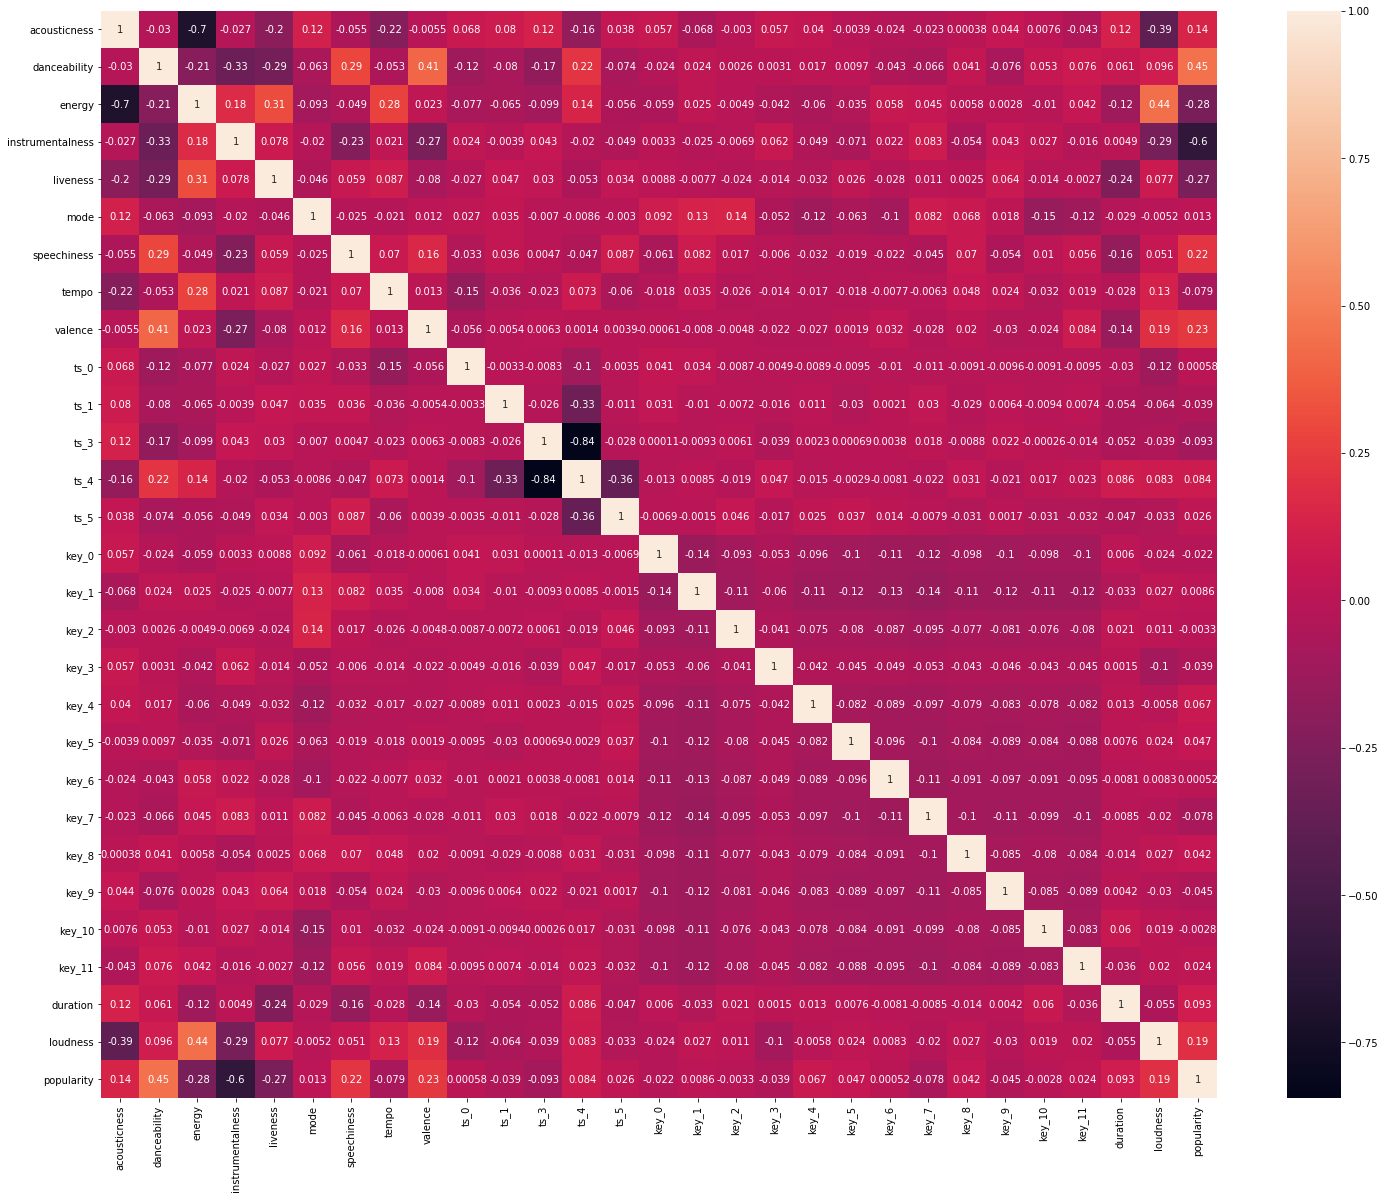

In [24]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True)

# Logistic Regression

### Create Features

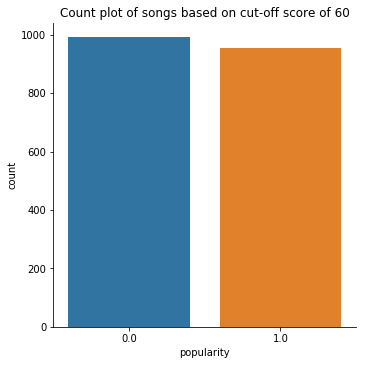

In [6]:
sns.catplot(x='popularity', kind='count', data=df, legend=True)
plt.title("Count plot of songs based on cut-off score of 60")
plt.show()

In [7]:
from pyspark.ml.feature import VectorAssembler

sp = spark.createDataFrame(df)
cols = sp.columns
cols.remove('popularity')
assembler = VectorAssembler(inputCols=cols, outputCol='features')

# conver input cols into features
sp = assembler.transform(sp)
sp.select('features').show(5, truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                               |
+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|(28,[0,1,2,3,4,6,7,8,12,15,26,27],[0.499,0.436,0.655,8.1E-6,0.688,0.0583,121.002,0.412,1.0,1.0,0.3065705655117042,0.7319045464826962])                 |
|(28,[0,1,2,3,4,5,6,7,8,12,16,26,27],[0.7,0.0692,0.285,0.6729999999999999,0.199,1.0,0.0482,78.572,0.0312,1.0,1.0,0.6199743615319538,0.5485749830355122])|
|(28,[0,1,2,4,6,7,8,12,21,26,27],[0.221,0.7,0.722,0.272,0.0369,90.989,0.7559999999999999,1.0,1.0,0.13579768022353,0.8679597376159239])                  |
|(28,[0,1,2,3,4,6,7,8,11,16,26,27],[0.7290000000000001,0.2,0.282,0.887,0.083

In [8]:
# from pyspark.ml.feature import StandardScaler

# standardscaler = StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
# sp=standardscaler.fit(sp).transform(sp)
# sp.select("features", "Scaled_features").show(5) 

### Split into Train and Test set

In [9]:
# random shuffling seed - fix the shuffling
train, test = sp.randomSplit([0.8, 0.2], seed = 2)

In [10]:
train.select("popularity").count()

1551

In [11]:
dataset_size = float(train.select("popularity").count())
numPositives = train.select("popularity").where("popularity == 1").count()
per_one = (float(numPositives)/ float(dataset_size))*100
print("The number of popular songs are: {}".format(numPositives))
print("Percentage of popular songs are {}".format(per_one))

numZeroes = float(dataset_size - numPositives)
per_zero = (numZeroes / dataset_size)*100
print("Percentage of not-popular songs are {}".format(per_zero))

The number of popular songs are: 757
Percentage of popular songs are 48.80722114764668
Percentage of not-popular songs are 51.192778852353314


In [13]:
# Add weights to training data
from pyspark.sql.functions import *

BalanceRatio = per_one/100
train = train.withColumn("classWeights", when(train.popularity == 1, BalanceRatio).otherwise(1 - BalanceRatio))
train.select("classWeights").show(5)

+------------------+
|      classWeights|
+------------------+
|0.5119277885235332|
|0.5119277885235332|
|0.5119277885235332|
|0.5119277885235332|
|0.5119277885235332|
+------------------+
only showing top 5 rows



In [14]:
from pyspark.ml.classification import LogisticRegression

### Using Weighted Columns
logit_model = LogisticRegression(labelCol='popularity', featuresCol='features', weightCol='classWeights', maxIter=20)
model = logit_model.fit(train)  # training algorithm

In [15]:
predict_train = model.transform(train)
predict_test = model.transform(test) 
predict_test.select("popularity", "prediction").show(5) 

+----------+----------+
|popularity|prediction|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 5 rows



In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="popularity", predictionCol="prediction", 
                                              metricName="accuracy")
# Evaluate on testing data
accuracy = evaluator.evaluate(predict_test)
print("Accuracy: ", (accuracy))

Accuracy:  0.8350253807106599


In [17]:
from sklearn.metrics import confusion_matrix

y_true = predict_test.select("popularity")
y_true = y_true.toPandas()

y_pred = predict_test.select("prediction")
y_pred = y_pred.toPandas()

confusion_mat = confusion_matrix(y_true, y_pred)
confusion_mat

array([[150,  46],
       [ 19, 179]])

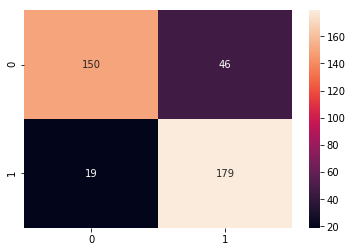

In [18]:
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82       196
         1.0       0.80      0.90      0.85       198

    accuracy                           0.84       394
   macro avg       0.84      0.83      0.83       394
weighted avg       0.84      0.84      0.83       394



# Without Rescaling and without class weights (Unbiased Datasets)

In [21]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

sp = spark.createDataFrame(df)
cols = sp.columns
cols.remove('popularity')
assembler = VectorAssembler(inputCols=cols, outputCol='features')

# conver input cols into features
sp = assembler.transform(sp)
# sp.select('features').show(5, truncate=False)


train, test = sp.randomSplit([0.8, 0.2], seed = 2)

# BalanceRatio = per_one/100
# train = train.withColumn("classWeights", when(train.popularity == 1, BalanceRatio).otherwise(1 - BalanceRatio))
# train.select("classWeights").show(5)

logit_model = LogisticRegression(labelCol='popularity', featuresCol='features', maxIter=20)
model = logit_model.fit(train)  # training algorithm

predict_train = model.transform(train)
predict_test = model.transform(test) 
predict_test.select("popularity", "prediction").show(5) 

+----------+----------+
|popularity|prediction|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 5 rows



In [22]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="popularity", predictionCol="prediction", 
                                              metricName="accuracy")
# Evaluate on testing data
accuracy_train = evaluator.evaluate(predict_train)
accuracy_test = evaluator.evaluate(predict_test)
print("Training Set Accuracy: ", (accuracy_train), '\n')
print("Test Set Accuracy: ", (accuracy_test))

Training Set Accuracy:  0.8684719535783365 

Test Set Accuracy:  0.8375634517766497


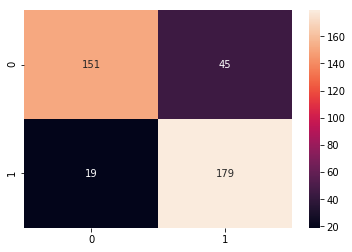

In [23]:
from sklearn.metrics import confusion_matrix

y_true = predict_test.select("popularity")
y_true = y_true.toPandas()

y_pred = predict_test.select("prediction")
y_pred = y_pred.toPandas()

confusion_mat = confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.show()

In [24]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83       196
         1.0       0.80      0.90      0.85       198

    accuracy                           0.84       394
   macro avg       0.84      0.84      0.84       394
weighted avg       0.84      0.84      0.84       394



In [25]:
trainingSummary = model.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

objectiveHistory:
0.6928626092871946
0.627410590207091
0.5241402727491699
0.42434002715766933
0.4029885387337372
0.3887333330850933
0.3711450386725346
0.3470006983458817
0.34381999046188216
0.3417953120008196
0.3412405644404137
0.3410407603427042
0.34087563328043907
0.3405810162601937
0.34028679476750545
0.34003757685542374
0.3398003065417879
0.339478626784263
0.3393893196693676
0.33913394293425714
0.33873284581495927


In [26]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

+--------------------+--------------------+
|                 FPR|                 TPR|
+--------------------+--------------------+
|                 0.0|                 0.0|
|0.003778337531486146|0.015852047556142668|
|0.005037783375314861|0.034346103038309116|
|0.006297229219143577|0.052840158520475564|
|0.006297229219143577|  0.0726552179656539|
|0.008816120906801008| 0.08982826948480846|
|0.010075566750629723|  0.1083223249669749|
|0.011335012594458438| 0.12681638044914134|
|0.011335012594458438| 0.14663143989431968|
|0.011335012594458438|   0.166446499339498|
|0.013853904282115869| 0.18361955085865259|
|0.018891687657430732| 0.19815059445178335|
|0.018891687657430732| 0.21796565389696168|
|0.020151133501259445| 0.23645970937912814|
|0.021410579345088162| 0.25495376486129456|
|0.022670025188916875| 0.27344782034346105|
| 0.02518891687657431|  0.2906208718626156|
|0.027707808564231738| 0.30779392338177014|
|0.028967254408060455| 0.32628797886393657|
|0.031486146095717885| 0.3434610

In [41]:
# summary = trainingSummary.roc.toPandas()
# sns.scatterplot(x=summary.FPR, y=summary.TPR)

# Decision Tree

In [33]:
from pyspark.ml.classification import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [34]:
sp = spark.createDataFrame(df)
cols = sp.columns
cols.remove("popularity")
feature = VectorAssembler(inputCols=cols, outputCol="features")
feature_vector = feature.transform(sp)
trainingData, testData = feature_vector.randomSplit([0.8, 0.2], seed = 11)

In [36]:
dt = DecisionTreeClassifier(labelCol="popularity", featuresCol="features")

dt_model = dt.fit(trainingData)
dt_training = dt_model.transform(trainingData)
dt_prediction = dt_model.transform(testData)
dt_prediction.select("prediction", 'popularity', 'features').show(5)

+----------+----------+--------------------+
|prediction|popularity|            features|
+----------+----------+--------------------+
|       0.0|       0.0|(28,[0,1,2,3,4,6,...|
|       0.0|       0.0|(28,[0,1,2,3,4,5,...|
|       0.0|       0.0|(28,[0,1,2,3,4,5,...|
|       0.0|       0.0|(28,[0,1,2,3,4,6,...|
|       0.0|       0.0|(28,[0,1,2,3,4,5,...|
+----------+----------+--------------------+
only showing top 5 rows



In [39]:
evaluator = MulticlassClassificationEvaluator(labelCol="popularity", predictionCol="prediction", 
                                             metricName="accuracy")

# Evaluate on testing data
accuracy_train = evaluator.evaluate(dt_training)
accuracy_test = evaluator.evaluate(dt_prediction)
print("Training Set Accuracy: ", (accuracy_train), '\n')
print("Test Set Accuracy: ", (accuracy_test))

Training Set Accuracy:  0.8998708010335917 

Test Set Accuracy:  0.8513853904282116


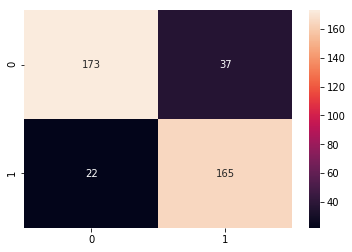

In [37]:
y_true = dt_prediction.select("popularity")
y_true = y_true.toPandas()

y_pred = dt_prediction.select("prediction")
y_pred = y_pred.toPandas()

confusion_mat = confusion_matrix(y_true, y_pred)
confusion_mat
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.show()

In [40]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       210
         1.0       0.82      0.88      0.85       187

    accuracy                           0.85       397
   macro avg       0.85      0.85      0.85       397
weighted avg       0.85      0.85      0.85       397



# Testing both models on generated dataset

In [47]:
evalData = spark.read.csv('file:///home/hadoop/spotify_eval.csv', inferSchema=True, header=True)
evalData.show(3)   

+---+------------+------------+------+----------------+--------+----+-----------+-------+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+-----------+-----------+
|_c0|acousticness|danceability|energy|instrumentalness|liveness|mode|speechiness|  tempo|valence|ts_0|ts_1|ts_3|ts_4|ts_5|key_0|key_1|key_2|key_3|key_4|key_5|key_6|key_7|key_8|key_9|key_10|key_11|   duration|   loudness|
+---+------------+------------+------+----------------+--------+----+-----------+-------+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+-----------+-----------+
|  0|       0.599|       0.436| 0.655|          8.1E-6|   0.688|   0|     0.0583|121.002|  0.737|   0|   0|   0|   1|   0|    0|    1|    0|    0|    0|    0|    0|    0|    0|    0|     0|     0|0.306570566|0.731904546|
|  1|         0.6|      0.0692| 0.285|           0.673|   0.199|   1|     0.0482| 78.572|  0.144|   0|   0|   0|   1

#### Logistic Regression

In [57]:
feature = VectorAssembler(inputCols=cols, outputCol="features")
feature_vector = feature.transform(evalData)
dt_prediction = model.transform(feature_vector)
dt_prediction.select("probability", "prediction").show(truncate=False)

+------------------------------------------+----------+
|probability                               |prediction|
+------------------------------------------+----------+
|[0.6636177494194562,0.3363822505805438]   |0.0       |
|[0.9915718467369371,0.008428153263062975] |0.0       |
|[0.23819355954507418,0.7618064404549258]  |1.0       |
|[0.9996709015962023,3.290984037976616E-4] |0.0       |
|[0.6054710619867777,0.39452893801322236]  |0.0       |
|[0.9705760464716037,0.029423953528396215] |0.0       |
|[0.041834858428763014,0.958165141571237]  |1.0       |
|[0.9986920818030733,0.0013079181969265358]|0.0       |
|[0.03712617064289648,0.9628738293571035]  |1.0       |
|[0.8070134412944134,0.19298655870558656]  |0.0       |
|[0.2981244349717708,0.7018755650282292]   |1.0       |
+------------------------------------------+----------+



#### Decision Tree

In [56]:
feature = VectorAssembler(inputCols=cols, outputCol="features")
feature_vector = feature.transform(evalData)
dt_prediction = dt_model.transform(feature_vector)
dt_prediction.select("probability", "prediction").show(truncate=False)

+-----------------------------------------+----------+
|probability                              |prediction|
+-----------------------------------------+----------+
|[0.8095238095238095,0.19047619047619047] |0.0       |
|[0.9747899159663865,0.025210084033613446]|0.0       |
|[0.13071895424836602,0.869281045751634]  |1.0       |
|[0.9747899159663865,0.025210084033613446]|0.0       |
|[1.0,0.0]                                |0.0       |
|[0.32075471698113206,0.6792452830188679] |1.0       |
|[0.32075471698113206,0.6792452830188679] |1.0       |
|[0.9747899159663865,0.025210084033613446]|0.0       |
|[0.13071895424836602,0.869281045751634]  |1.0       |
|[0.32075471698113206,0.6792452830188679] |1.0       |
|[1.0,0.0]                                |0.0       |
+-----------------------------------------+----------+



In [58]:
spark.stop()
sc.stop()